In [97]:
from pathlib import Path

import Anonymize.Anonymization as anonym
import PixelArrays
import pydicom
import nibabel
import numpy as np

from PIL import Image  
from enum import Enum

In [74]:
class ImageType(Enum):
    DCM = 0
    NIFTI = 1
    JPG = 2
    PNG = 3

In [75]:
class ImageObject(object):
    
    src_folder = None
    src_filename = None

    file_type = None
    
    pixel_array = None
    slices = []
    slice_no = 0
    current_slice_number = 0
    image_object = None
    
    def __init__(self, src_folder, filename):
        
        self.src_folder = src_folder
        self.src_filename = filename
        self.current_slice_number = 0
        self.total_slice_number = 0
    
    def save_anonymized_file(self, filename, destination_folder):
        pass
    
    def get_current_slice(self):
        pass

    def get_next_slice(self, value):
        pass

    

In [92]:
class DicomImage(ImageObject):
    
    slices_path_list = []
    
    def __init__(self, folder, filename):
        
        super().__init__(folder, filename)
        self.file_type = ImageType.DCM
        self.image_object = anonym.get_anonymized_dicom(filename, folder)
        self.pixel_array = self.image_object.pixel_array
        self.slices_path_list = list(Path(self.src_folder).iterdir())
        self.total_slice_number = len(self.slices_path_list)
    
    def save_anonymized_file(self, filename, destination_folder):
        
        try:           
            output_file_path = Path(destination_folder) / filename
            self.image_object.save_as(output_file_path)
            return True
        
        except Exception as ex:
            print(ex)
            return False
    
    def get_current_slice(self):
        
        return self.pixel_array
    
    def get_next_slice(self, value):
        
        if value >= self.total_slice_number:
            self.current_slice_number = self.total_slice_number - 1
        elif value <= 0:
            self.current_slice_number = 0
        else:
            self.current_slice_number = value
            
        self.src_filename = self.slices_path_list[value].name
        
        self.image_object = anonym.get_anonymized_dicom(self.src_filename, self.src_folder)
        self.pixel_array = self.image_object.pixel_array
        return self.pixel_array 
        

In [85]:
class NiftiImage(ImageObject):
    
    def __init__(self, folder, filename):
        
        super().__init__(folder, filename)
        self.file_type = ImageType.NIFTI
        self.image_object = anonym.get_anonymized_nifti(filename, folder)
        self.pixel_array = self.image_object.get_fdata().T
        self.total_slice_number = self.image_object.shape[2]
    
    def save_anonymized_file(self, filename, destination_folder):
        
        try:           
            output_file_path = Path(destination_folder) / filename
            nibabel.save(self.image_object, output_file_path)
            return True
        
        except Exception as ex:
            print(ex)
            return False
    
    def get_current_slice(self):
        return self.pixel_array[self.current_slice_number]
    
    def get_next_slice(self, value):
        if value >= self.total_slice_number:
            self.current_slice_number = self.total_slice_number - 1
        elif value <= 0:
            self.current_slice_number = 0
        else:
            self.current_slice_number = value
            
        return self.pixel_array[self.current_slice_number]

In [87]:
class JpgImage(ImageObject):
    
    def __init__(self, folder, filename):
        
        super().__init__(folder, filename)
        self.file_type = ImageType.JPG
        self.image_object = anonym.get_anonymized_png_jpg(filename, folder)
        self.pixel_array = np.array(self.image_object)
        self.total_slice_number = 1
    
    def save_anonymized_file(self, filename, destination_folder):
        
        try:           
            output_file_path = Path(destination_folder) / filename
            self.image_object.save(output_file_path)
            return True
        
        except Exception as ex:
            print(ex)
            return False
    
    def get_current_slice(self):
        return self.pixel_array
    
    def get_next_slice(self, value):
        return self.pixel_array

In [88]:
class PngImage(ImageObject):
    
    def __init__(self, folder, filename):
        
        super().__init__(folder, filename)
        self.file_type = ImageType.PNG
        self.image_object = anonym.get_anonymized_png_jpg(filename, folder)
        self.pixel_array = np.array(self.image_object)
        self.total_slice_number = 1
    
    def save_anonymized_file(self, filename, destination_folder):
        
        try:           
            output_file_path = Path(destination_folder) / filename
            self.image_object.save(output_file_path)
            return True
        
        except Exception as ex:
            print(ex)
            return False
    
    def get_current_slice(self):
        return self.pixel_array
    
    def get_next_slice(self, value):
        return self.pixel_array

In [93]:
dcm = DicomImage(r"D:\Studia\sem7\inzynierka\aplikacja\test_data\pacjent_dcm", "Italy_case010000.dcm")

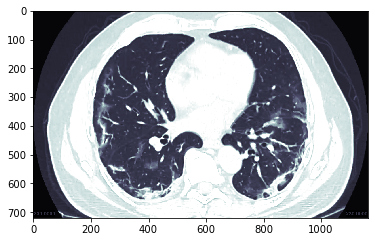

In [82]:
plt.imshow(dcm.get_next_slice(100), cmap=plt.cm.bone) 

In [94]:
dcm.save_anonymized_file("new_file.dcm", ".")

True

In [3]:
sample_folder = r"D:\Studia\sem7\inzynierka\aplikacja\test_data"
sample_dcm = "Italy_case010000.dcm"
sample_nii = "coronacases_org_001.nii"
sample_jpg = "ct1.jpg"
sample_png = "ct2.png"

In [41]:
type(pa)

numpy.ndarray

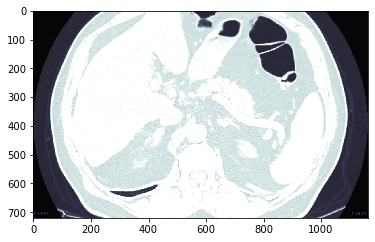

In [8]:
import matplotlib.pyplot as plt
import pydicom
plt.imshow(pa, cmap=plt.cm.bone) 

True

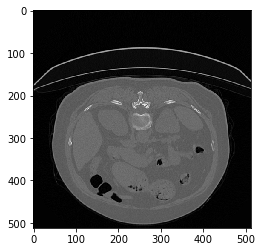

In [99]:
img = NiftiImage(sample_folder, sample_nii)
plt.imshow(img.get_current_slice(), cmap='gray') 
img.image_object.shape[2]
img.save_anonymized_file("new_file.nii", ".")

True

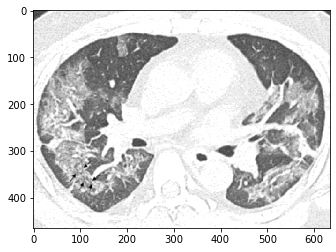

In [100]:
img = PngImage(sample_folder, sample_png)
plt.imshow(img.get_current_slice(), cmap='gray') 
img.save_anonymized_file("new_file.png", ".")

True

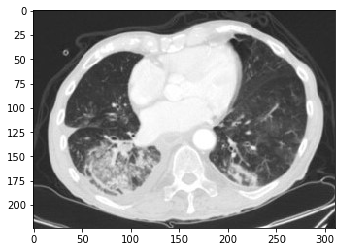

In [101]:
img = JpgImage(sample_folder, sample_jpg)
plt.imshow(img.get_current_slice(), cmap='gray') 
img.save_anonymized_file("new_file.jpg", ".")